### Seeds Dataset
#### Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes. The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment

Data set source: https://archive.ics.uci.edu/ml/datasets/seeds

This dataset does contain label (Unnamed: 7). Will be processing the dataset by removing the given label

In [8]:
import pandas as pd

seed_df = pd.read_csv("C:/Users/Nikitha/OneDrive/Documents/School/Assignments/Math_Methods_in_DA/seed_dataset.csv")

seed_df.describe().T

seed_df.dtypes

area                       float64
perimeter                  float64
compactness                float64
length_of_kernel           float64
width_of_kernel            float64
asymmetry_coefficient      float64
length_of_kernel_groove    float64
class                        int64
dtype: object

In [11]:
#Renaming the the label column to class
seed_df = seed_df.rename(columns={'Unnamed: 7': 'class'})
pd.set_option('precision', 2)
seed_df.head(50)

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,1
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,1
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,1
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,1
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17,1
5,14.38,14.21,0.90,5.39,3.31,2.46,4.96,1
6,14.11,14.10,0.89,5.42,3.30,2.70,5.00,1
7,14.69,14.49,0.88,5.56,3.26,3.59,5.22,1
8,16.63,15.46,0.87,6.05,3.46,2.04,5.88,1
9,16.44,15.25,0.89,5.88,3.50,1.97,5.53,1


In [4]:
#Convert the pandas dataframe to a numpy array
#Removing the label

seed_np = seed_df[["area","perimeter","compactness","length_of_kernel","width_of_kernel","asymmetry_coefficient","length_of_kernel_groove"]].to_numpy()

### Visualizing of the data

#### Below represents a pairwise plotting including hue and without to understand the relationship between possible pairs

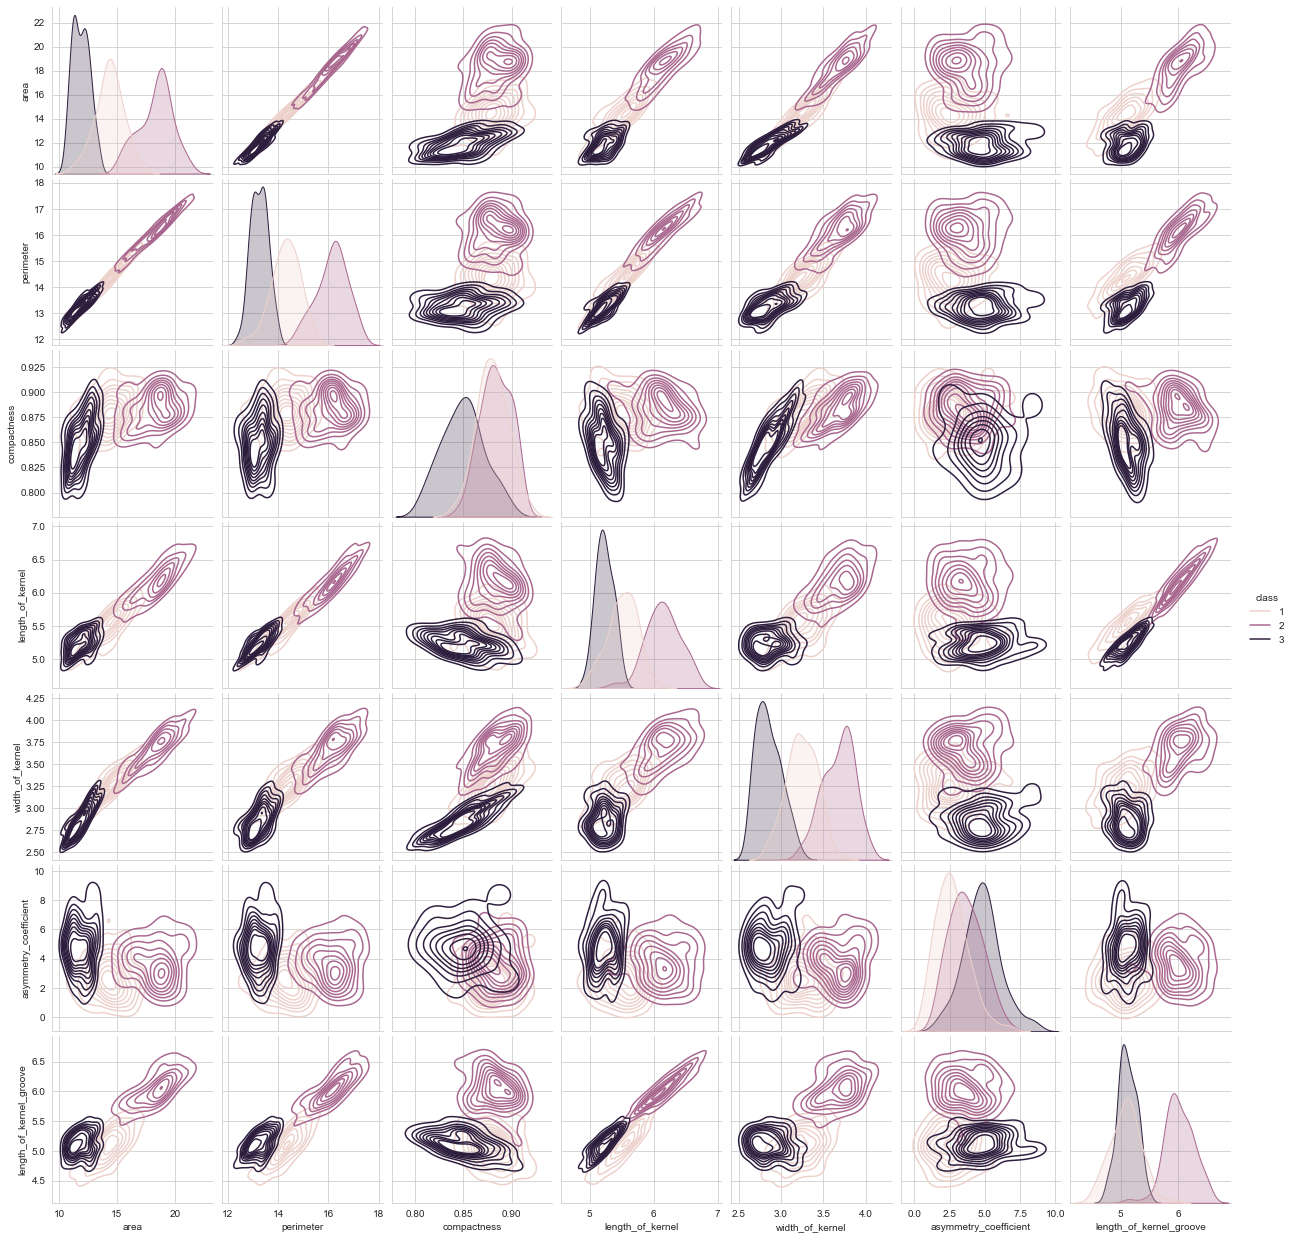

In [5]:
import seaborn as sns

sns.set_style('whitegrid')

pairing_grid = sns.pairplot(data=seed_df, vars=seed_df.columns[0:7], hue="class", kind="kde")

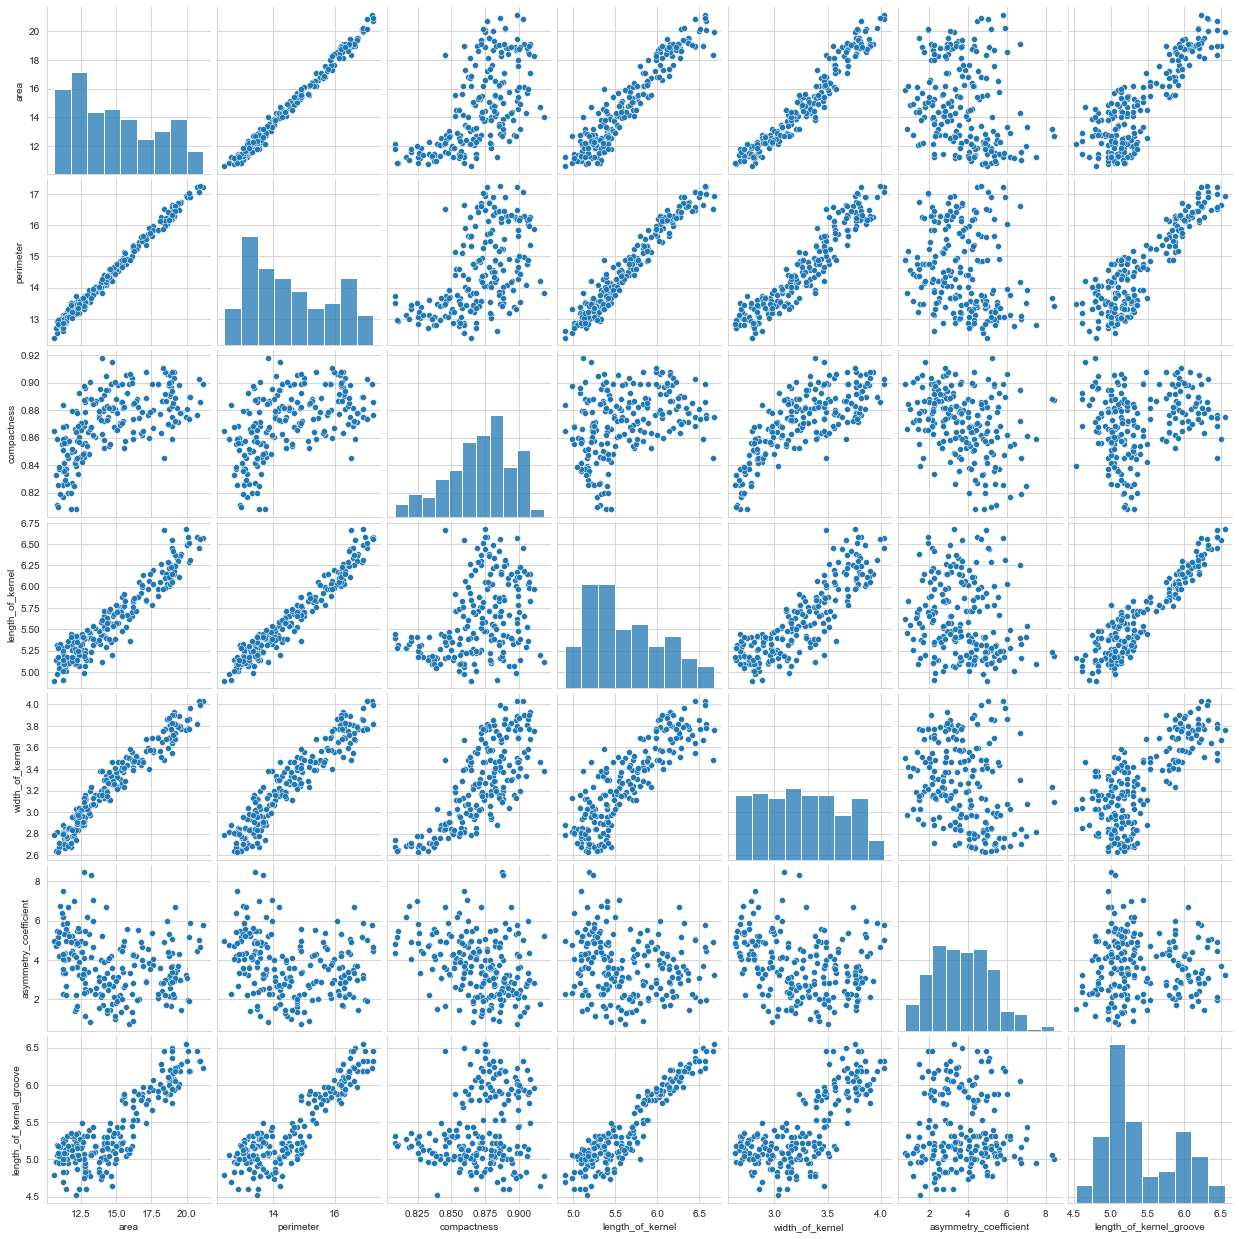

In [5]:
sns.pairplot(data=seed_df, vars=seed_df.columns[0:7])

### KMeans clustering

In [6]:
#training the model to cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=7)
kmeans.fit(seed_np)

KMeans(n_clusters=3, random_state=7)

In [7]:
#To check existing label counts before validation
seed_df.groupby(by=["class"]).count()

#1 --> Kama
#2 --> Rosa
#3 --> Canadian

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
class,,,,,,,
1,70,70,70,70,70,70,70
2,70,70,70,70,70,70,70
3,70,70,70,70,70,70,70


In [8]:
# Predicted labels

kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
#Against label 0 in seeds data

print(kmeans.labels_[0:70]) 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0]


In [10]:
#Against label 1 in seeds data

print(kmeans.labels_[70:140]) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2]


In [11]:
#against label 2 in seeds data

print(kmeans.labels_[140:210])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]


#### By performing clustering, 3 clusters are formed. Each cluster has majority of same labels with few expections

#### Against each label (source data label) 85.7% of the new labels fall into one cluster and rest 14.3% belong to one of the 2 other clusters. 

### Dimensionality Reduction using Principle Component Analysis

In [12]:
from sklearn.decomposition import PCA

#Reducing 7 components to 2 components


In [ ]:
reduced_seed = pca.transform(seed_np)
print("Shape after reduction:",reduced_seed.shape)

In [ ]:
#Constructing a dataframe with the reduced dimensions to 2
reduced_seed_df = pd.DataFrame(reduced_seed, columns=['Component 1', 'Component 2'])
reduced_seed_df['class'] = seed_df['class']

#### Dimensionality reduction here is used for the purpose of visualization

In [ ]:
#Visualizing after reduction

import matplotlib.pyplot as plt

axes = sns.scatterplot(data=reduced_seed_df, hue='class', x='Component 1', y='Component 2') 

seeds_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(seeds_centers[:,0], seeds_centers[:,1], s=150, c='k')

### K-Nearest Neighbour Classification

#### Here we can implement the K-Nearest Neighbour Classification using 2 different labels of the data
1. Source data lable
2. Labels derived from Clustering

#### TO IMPLEMENT 1 DONOT RUN THE BELOW CODE. TO IMPLEMENT 2 RUN IT!

In [ ]:
#Assigning the predicted clustered label values as the label for the seeds

seed_df['class'] = kmeans.labels_

seed_df.head()

#### Splitting the data into test and train sets

In [ ]:
seed_np_1 = seed_df.to_numpy()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(seed_np, seed_df[['class']].to_numpy(), random_state=57)

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

#### Train the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() #By default n_neighbor value is 5
knn.fit(X=X_train, y=y_train)

#### Test the model

In [ ]:
predicted = knn.predict(X=X_test)
expected = y_test.flatten()

print('First twenty predictions:')
print(f'predicted[:50] = {predicted[:50]}')
print(f' expected[:50] = {expected[:50]}')

In [ ]:
#Wrong set of predictions
wrong = [ (pred, exp) for (pred, exp) in zip(predicted, expected) if pred != exp]

print('Wrong predictions:', wrong)

#### Prediction accuracy

In [ ]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

#### Classification Report

In [ ]:
#Making classification report
from sklearn.metrics import classification_report

print(classification_report(expected, predicted, target_names=['class_0','class_1','class_2']))

### REPORT:
#### Using K Mean clustering on the seed dataset I'd say it did give meaningful results, 85.7% match is observed in forming clusters.
#### For K Nearest Neighbor Classification, when taken the input of label as output of the K Means clustering to train the data there is greater prediction accuracy around 98-99%. On the original label of the seed data when KNN is trained, it gives only about 90% accuracy. You can evaluate both by running the code in two different ways as mentioned under the title of KNN classification. 
#### Hence I observed that clustering being done before classification helped the accuracy of KNN classification to be around 99% 